In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


%load_ext tensorboard

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import datetime
import os
import copy

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_labels = None
train_images = None
test_labels = None
test_images = None
class_names = None
history = None

In [3]:
def processDataset():
    global train_labels
    global train_images
    global test_labels
    global test_images
    global class_names
    
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
print(train_labels)
processDataset()
print(train_labels)


None
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


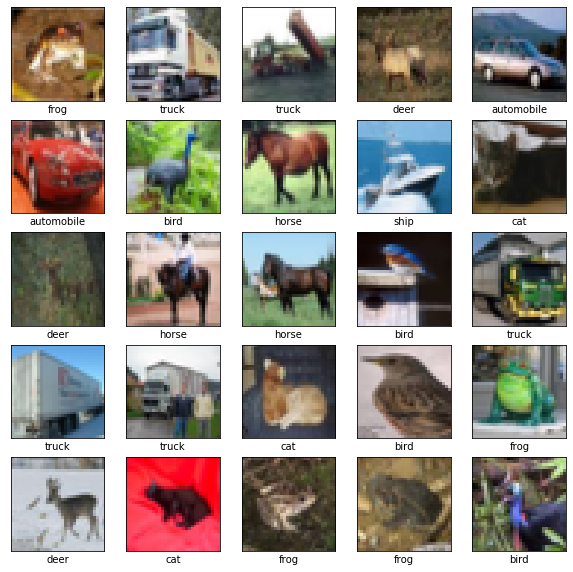

In [4]:
def showDataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    
showDataset()

In [5]:
def evaluateModel(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('Acc: ' + str(test_acc))
    print('Loss:' + str(test_loss))

In [6]:
def showPredictions(model):
    probability_model = keras.Sequential([model, keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    
    
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()


    
    
    
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')


In [7]:
def showLoss():
    plt.figure(2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 2])
    plt.legend(loc='lower right')

In [8]:
def showAccuracy():
    plt.figure(1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

In [9]:
def trainModelAdam(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "fit2",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit2
    #model.build()
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    
    

In [10]:
def trainModelAdamax(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit
    #model.build()
    
    model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    

# Define generic models
model_1_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

model_1_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])


# model 2 = model 1 with batch normalisation added between conv and activation, as shown in slides
model_2_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

model_2_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])


#model 3 is model 1 with dropout added after maxPooling and before end, as shown in 
#https://keras.io/examples/cifar10_cnn/ **
#https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
model_3_relu = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

model_3_tanh = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#control is model 1 but only the fully connected dense layers as control
control_relu = keras.Sequential([
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

control_tanh = keras.Sequential([
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

M1AdamRelu = model_1_relu
M1AdamTanH = model_1_tanh
M1AdamaxRelu = model_1_relu
M1AdamaxTanH = model_1_tanh

M2AdamRelu = model_2_relu
M2AdamTanH = model_2_tanh
M2AdamaxRelu = model_2_relu
M2AdamaxTanH = model_2_tanh

M3AdamRelu = model_3_relu
M3AdamTanH = model_3_tanh
M3AdamaxRelu = model_3_relu
M3AdamaxTanH = model_3_tanh

CAdamRelu = control_relu
CAdamTanH = control_tanh
CAdamaxRelu = control_relu
CAdamaxTanH = control_tanh

## Model 1
### Adam

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

Reusing TensorBoard on port 6006 (pid 20836), started 0:01:30 ago. (Use '!kill 20836' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/75
50000/50000 [==============================] - 28s 555us/sample - loss: 1.5609 - accuracy: 0.4328 - val_loss: 1.2874 - val_accuracy: 0.5381
Epoch 2/75
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.1921 - accuracy: 0.5763 - val_loss: 1.0627 - val_accuracy: 0.6200
Epoch 3/75
50000/50000 [==============================] - 17s 343us/sample - loss: 1.0296 - accuracy: 0.6398 - val_loss: 1.0458 - val_accuracy: 0.6318
Epoch 4/75
50000/50000 [==============================] - 12s 239us/sample - loss: 0.9236 - accuracy: 0.6761 - val_loss: 0.9206 - val_accuracy: 0.6793
Epoch 5/75
50000/50000 [==============================] - 10s 207us/sample - loss: 0.8522 - accuracy: 0.7007 - val_loss: 0.9231 - val_accuracy: 0.6787
Epoch 6/75
50000/50000 [==============================] - 10s 201us/sample - loss: 0.7889 - accuracy: 0.7221 - val_loss: 0.8656 - val_accuracy: 0.6987
Epoch 7/75
50000/50000 [======================

50000/50000 [==============================] - 11s 217us/sample - loss: 0.1331 - accuracy: 0.9533 - val_loss: 2.6016 - val_accuracy: 0.6757
Epoch 55/75
50000/50000 [==============================] - 11s 217us/sample - loss: 0.1207 - accuracy: 0.9593 - val_loss: 2.6377 - val_accuracy: 0.6834
Epoch 56/75
50000/50000 [==============================] - 11s 220us/sample - loss: 0.1199 - accuracy: 0.9573 - val_loss: 2.8192 - val_accuracy: 0.6746
Epoch 57/75
50000/50000 [==============================] - 11s 229us/sample - loss: 0.1240 - accuracy: 0.9570 - val_loss: 2.7634 - val_accuracy: 0.6700
Epoch 58/75
50000/50000 [==============================] - 11s 223us/sample - loss: 0.1279 - accuracy: 0.9556 - val_loss: 2.7783 - val_accuracy: 0.6784
Epoch 59/75
50000/50000 [==============================] - 10s 203us/sample - loss: 0.1145 - accuracy: 0.9606 - val_loss: 2.6963 - val_accuracy: 0.6804
Epoch 60/75
50000/50000 [==============================] - 11s 219us/sample - loss: 0.1264 - accurac

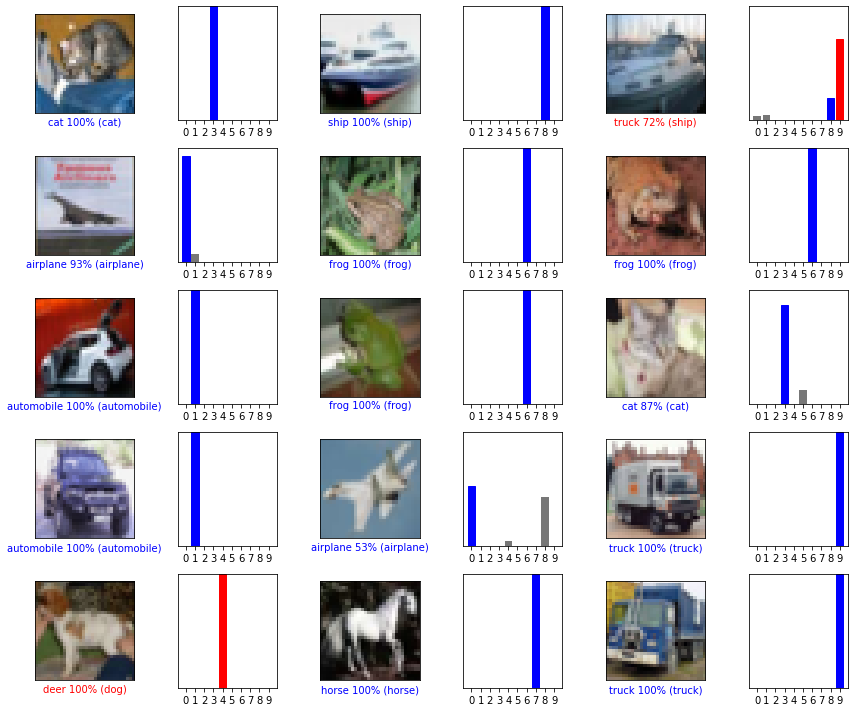

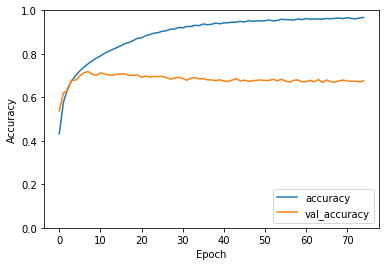

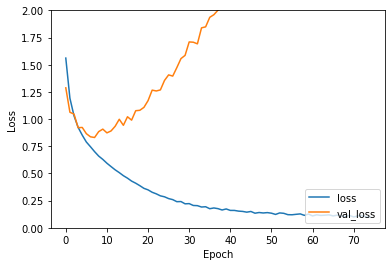

In [11]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 75)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

Reusing TensorBoard on port 6006 (pid 20836), started 0:15:36 ago. (Use '!kill 20836' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/75
50000/50000 [==============================] - 12s 239us/sample - loss: 1.4077 - accuracy: 0.5024 - val_loss: 1.2274 - val_accuracy: 0.5751
Epoch 2/75
50000/50000 [==============================] - 11s 220us/sample - loss: 1.1297 - accuracy: 0.6061 - val_loss: 1.0888 - val_accuracy: 0.6197
Epoch 3/75
50000/50000 [==============================] - 12s 237us/sample - loss: 1.0202 - accuracy: 0.6450 - val_loss: 1.0253 - val_accuracy: 0.6501
Epoch 4/75
50000/50000 [==============================] - 12s 242us/sample - loss: 0.9553 - accuracy: 0.6693 - val_loss: 1.0077 - val_accuracy: 0.6540
Epoch 5/75
50000/50000 [==============================] - 11s 225us/sample - loss: 0.9003 - accuracy: 0.6905 - val_loss: 0.9865 - val_accuracy: 0.6640
Epoch 6/75
50000/50000 [==============================] - 12s 246us/sample - loss: 0.8547 - accuracy: 0.7025 - val_loss: 1.0127 - val_accuracy: 0.6524
Epoch 7/75
50000/50000 [====================

50000/50000 [==============================] - 10s 193us/sample - loss: 0.2419 - accuracy: 0.9139 - val_loss: 1.6476 - val_accuracy: 0.6422
Epoch 55/75
50000/50000 [==============================] - 10s 191us/sample - loss: 0.2495 - accuracy: 0.9116 - val_loss: 1.6050 - val_accuracy: 0.6486
Epoch 56/75
50000/50000 [==============================] - 10s 196us/sample - loss: 0.2545 - accuracy: 0.9084 - val_loss: 1.6275 - val_accuracy: 0.6408
Epoch 57/75
50000/50000 [==============================] - 10s 192us/sample - loss: 0.2522 - accuracy: 0.9104 - val_loss: 1.6709 - val_accuracy: 0.6418
Epoch 58/75
50000/50000 [==============================] - 9s 189us/sample - loss: 0.2424 - accuracy: 0.9136 - val_loss: 1.6238 - val_accuracy: 0.6392
Epoch 59/75
50000/50000 [==============================] - 10s 203us/sample - loss: 0.2409 - accuracy: 0.9145 - val_loss: 1.6664 - val_accuracy: 0.6487
Epoch 60/75
50000/50000 [==============================] - 10s 199us/sample - loss: 0.2461 - accuracy

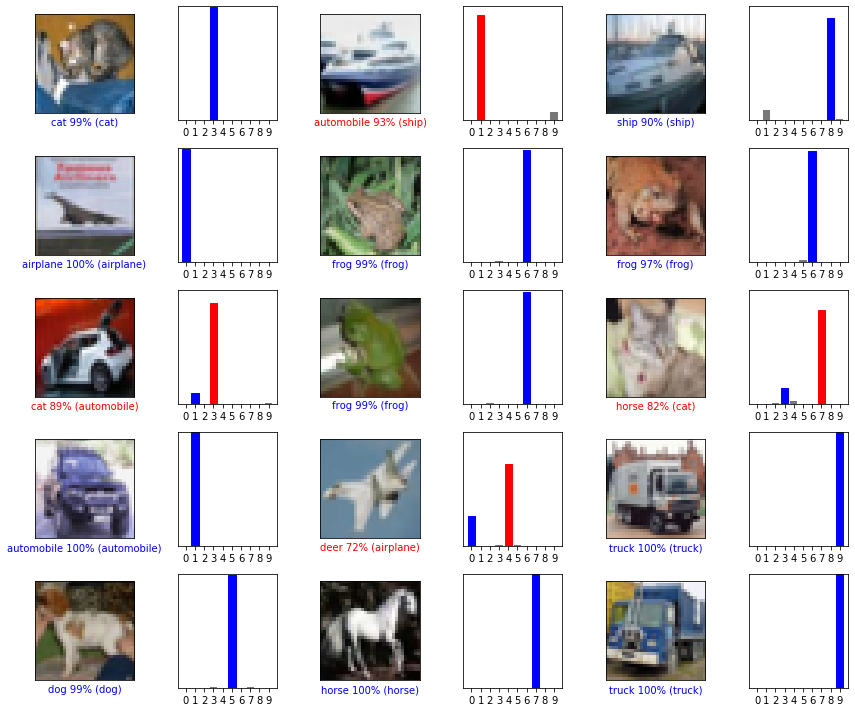

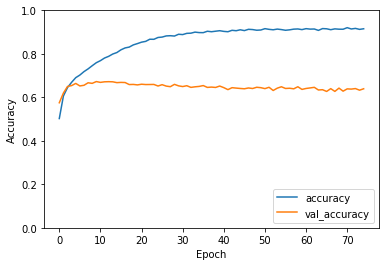

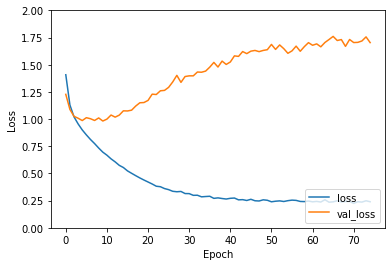

In [12]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 75)

### Adamax

In [13]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 75)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 5032.

Train on 50000 samples, validate on 10000 samples
Epoch 1/75
50000/50000 [==============================] - 11s 229us/sample - loss: 1.6398 - accuracy: 0.4003 - val_loss: 1.4219 - val_accuracy: 0.4779
Epoch 2/75
50000/50000 [==============================] - 12s 231us/sample - loss: 1.3151 - accuracy: 0.5317 - val_loss: 1.2152 - val_accuracy: 0.5701
Epoch 3/75
50000/50000 [==============================] - 11s 227us/sample - loss: 1.1759 - accuracy: 0.5855 - val_loss: 1.1176 - val_accuracy: 0.6069
Epoch 4/75
50000/50000 [==============================] - 12s 250us/sample - loss: 1.0759 - accuracy: 0.6220 - val_loss: 1.0603 - val_accuracy: 0.6275
Epoch 5/75
50000/50000 [==============================] - 12s 245us/sample - loss: 0.9962 - accuracy: 0.6501 - val_loss: 0.9977 - val_accuracy: 0.6533
Epoch 6/75
50000/50000 [==============================] - 12s 234us/sample - loss: 0.9323 - accuracy: 0.6730 - val_loss: 0.9781 - val_accuracy: 0.6582
Epoch 7/75
50000/50000 [====================

KeyboardInterrupt: 

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 75)

## Model 2
### Adam

In [ ]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

#trainModelAdam(testModel1, 75)

In [ ]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

#trainModelAdam(testModel2, 50)

### Adamax

In [ ]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

#trainModelAdamax(testModel3, 50)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

#trainModelAdamax(testModel4, 50)

## Model 3
### Adam

In [ ]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 75)

In [ ]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])
trainModelAdam(testModel2, 75)

### Adamax

In [ ]:
testModel3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 75)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])
trainModelAdamax(testModel4, 75)

## Control
### Adam

In [ ]:
testModel1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 75)

In [ ]:
testModel2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 75)

### Adamax

In [ ]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel3, 75)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdamax(testModel4, 75)

### Batch + Dropout

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#trainModelAdam(testModel4, 50)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#trainModelAdam(testModel4, 50)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#trainModelAdamax(testModel4, 50)

In [ ]:
testModel4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

#trainModelAdamax(testModel4, 50)